In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
output_path = "../data/processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'HDD_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

np.random.seed(123)
merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])



In [3]:
features = [
    "HDD_total_year", 
    "GDP_per_capita", 
    "Urbanization_Rate_2022",
    "latitude",
    "longitude",  
    "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index"
]

feature_abbreviations = {
    "HDD_total_year": "HDD",
    "GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
    "latitude": "Lat",
    "longitude": "Long",
    "Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU" , 
    "Income index": "Income"
}

target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

merged_df['EUI (kWh/m2/year)'] = merged_df[target_columns[0]] + merged_df[target_columns[1]]


In [4]:
# Function to calculate feature importance and return the importance table --> (THIS IS THE INPUT FOR THE PLOT)
def calculate_feature_importance(df, features, target_columns, feature_abbreviations):
    # Create the sum of the target columns
    total_eui = df[target_columns[0]] + df[target_columns[1]]
    
    # Prepare data
    X = df[features]
    y = total_eui
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Scale target (optional, but recommended for interpretation)
    y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1)).ravel()
    
    # Train model
    model = LinearRegression()
    model.fit(X_scaled, y_scaled)
    
    # Get feature importance (absolute coefficients)
    importance = np.abs(model.coef_)
    
    # Create DataFrame with importance
    importance_df = pd.DataFrame({
        'Feature': [feature_abbreviations.get(f, f) for f in features],
        'Importance': importance
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=True)
    
    return importance_df


importance_df = calculate_feature_importance(merged_df, features, target_columns, feature_abbreviations)
importance_df

,Feature,Importance
1,GDP,0.001931
5,Paris,0.024728
7,EDU,0.062440
4,Long,0.088552
8,Income,0.114043
2,URB,0.116151
3,Lat,0.202285
6,HDI,0.371646
0,HDD,0.515993


## This is just a suggestion; I leave it to your discretion

Title:
HDD and HDI are the key factors influencing Energy use intensity

Subtitle: 
Feature Importance for Predicting Energy Usage Intensity (EUI)

Figure caption: 
The chart shows the feature importance for predicting energy usage intensity (EUI) in buildings using a linear regression model. The importance of each feature is reflected by the magnitude of its coefficient, with larger values indicating a greater influence on the model's prediction of EUI. Heating Degree Days (HDD), a measure of heating demand based on temperature, and the Human Development Index (HDI) are the most influential factors.


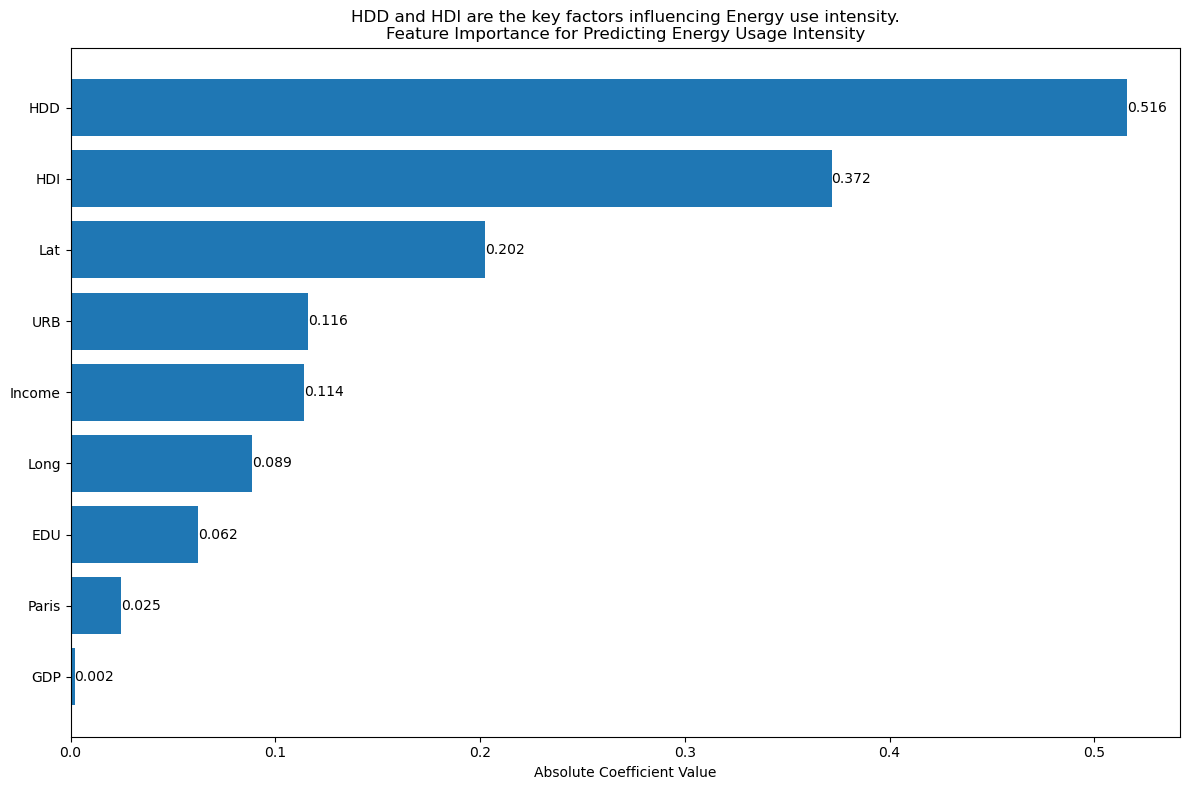

In [ ]:
# Function to plot the feature importance
def plot_feature_importance(importance_df):
    # Create a figure with a larger size
    plt.figure(figsize=(12, 8))  # Increase size as needed
    
    # Create basic horizontal bar plot
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('HDD and HDI are the key factors influencing Energy use intensity.\nFeature Importance for Predicting Energy Usage Intensity')

    # Annotate each bar with the importance value
    for index, value in enumerate(importance_df['Importance']):
        plt.text(value, index, f'{value:.3f}', va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

# Call the function (example)
plot_feature_importance(importance_df)

